## The curse of dimensionality:
#### The dimensionality of a model is the number of predictor or input variables used by the model. The curse of dimensionality is the affliction caused by adding variables to multivariate data models. As more variables are added, the data space becomes more sparse. One way to think about it is consider a position on the chess board which is in two dimension (8x8) has moves within 64 possible places. By adding one more dimension to it and making it (8x8x8) we make the number of possible moves to 512, which is increase by 800%.

### One key step in data mining is therefore to find a way to reduce the number dimension with minimum loss of accuracy.

# PCA
### Principal component analysis (PCA) is one of the oldest and most commonly used projection algorithm in machine learning. It linearly projects high dimentional multivariate numeric data, with possibly correlated features, into a set of lower orthogonal, uncorrelated dimentions where the first dimension captures most of the variance, next dimension, while being orthogonal to the first, captures the remaining variance, and so on.

#### Note that PCA is more suitable for numeric data. For use of categorical data, other methods such as correspondence analysis are more suitable.

## Intution:
#### The real information in the data from a statistical perspective is the variability in it. So any projection that maximizes the variance in the projected space is considered the first principal component (direction of projection). 

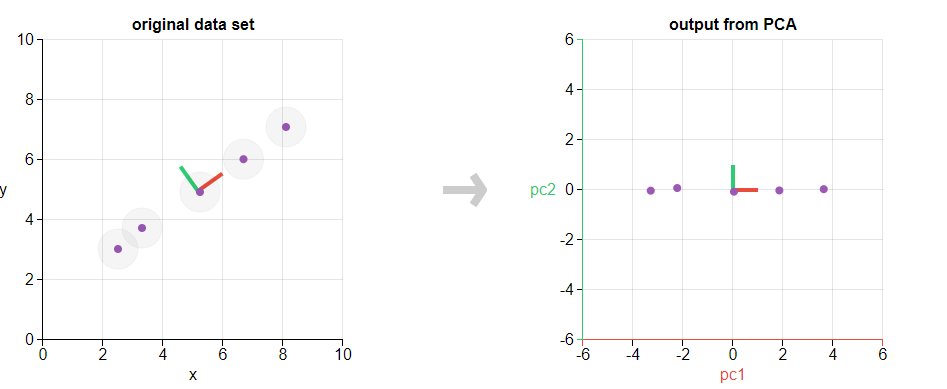

This example is taken from the interactive exampe of https://setosa.io/ev/principal-component-analysis/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
data = pd.read_csv("/kaggle/input/lish-moa/train_features.csv")
data.head()

In [ ]:
data = data.drop(columns = ["sig_id", "cp_type", "cp_time", "cp_dose"])
data.shape

### In the train dataset, we have 872 numeric columns. We will apply PCA on this dataset to reduce the dimensionality of this dataset.

## How PCA Works?
Listed below are the 6 general steps for performing a principal component analysis, which we will investigate in the following sections.

- Take the whole dataset consisting of d-dimensional samples ignoring the class labels
- Compute the d-dimensional mean vector (i.e., the means for every dimension of the whole dataset)
- Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set
- Compute eigenvectors (e1,e2,...,ed) and corresponding eigenvalues (λ1,λ2,...,λd)
- Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix W(where every column represents an eigenvector)
- Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: y = WT×x (where x is a d×1-dimensional vector representing one sample, and y is the transformed k×1-dimensional sample in the new subspace.)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50).fit(data)
data_transformed = pd.DataFrame(pca.transform(data))

In [ ]:
data_transformed

In [ ]:
## Variance explained
variance = pca.explained_variance_ratio_

print('Explained variation per principal component: {0}'.format(variance))

In [ ]:
# calculate variance ratios
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)

print('Explained cumulative variation for 30 principal components: {0}'.format(variance_ratio))

In [ ]:
plt.figure(figsize=(15, 8))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100)
plt.style.context('seaborn-whitegrid')
plt.plot(variance_ratio)
plt.show()

# References:
1. https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
2. https://setosa.io/ev/principal-component-analysis/